In [106]:
# Librerías que usamos
import numpy as np 
import pandas as pd 
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint, LinearConstraint, Bounds

### Modelo a ajustar aquí 

Solo patada en los medios:

$$ \dot m = - p m + \alpha b_{\tau} $$

$$ \dot b = -q b + r m + k b b_{\tau}$$

donde $b_{\tau} = b(t - \tau)$ que puede ser reemplazada por un conjunto finito de ecuaciones diferenciales ordinarias que simulen una distribución de delays.


In [107]:
def integrate_model(args, tmax, x0):
    
    p, alpha, q, r, k, tau = args
    tt = np.arange(0, tmax, 0.01)
         
    def model(x, t, p, alpha, q, r, k, tau):
         
            n = len(x)
            fs = np.zeros(n)
            
            fs[0] = - p * x[0] + alpha * x[-1]
            fs[1] = - q * x[1] + r * x[0] + k * x[1] * x[-1]
            for i in range(2, n):
                fs[i] = ((n-2)/tau) * (x[i-1] - x[i])
    
            return fs
        
    # Integración numérica del modelo 
    yint = odeint(model, x0, tt, args=(p, alpha, q, r, k, tau), full_output=0)

    return tt, yint        

### Exact model with delay

In [108]:
from ddeint import ddeint

def model(Y, t, d):
    x, y = Y(t)
    xd, yd = Y(t - d)
    return array([-0.03 * x + 0.03 * yd, -0.9 * y + 0.8 * x + (-3.8) * y * yd])

d = 60
g = lambda t: array([1.00, 0.00])

tt = np.arange(0, 168, 0.01)
yy = ddeint(model, g, tt, fargs=(d,))

### Aproximate model 

In [81]:
# Same params 
params = [0.03, 0.03, 0.9, 0.8, -3.8, 60]

In [153]:
data2plot = []
for n_gammas in [2**i for i in range(0, 10)]:
    tt_gamma, yy_gamma = integrate_model(params, 168, [1.00, 0.00] + [0.00]*n_gammas)
    data2plot.append([n_gammas, r_square(yy, yy_gamma)])

In [154]:
def r_square(y_true, y_aprox):
    
    r2_media = 1.00 - np.sum((y_true[:,0] - y_aprox[:,0])**2) / np.sum((y_true[:,0] - y_true[:,0].mean())**2)
    r2_blog = 1.00 - np.sum((y_true[:,1] - y_aprox[:,1])**2) / np.sum((y_true[:,1] - y_true[:,1].mean())**2)
    
    return r2_media, r2_blog

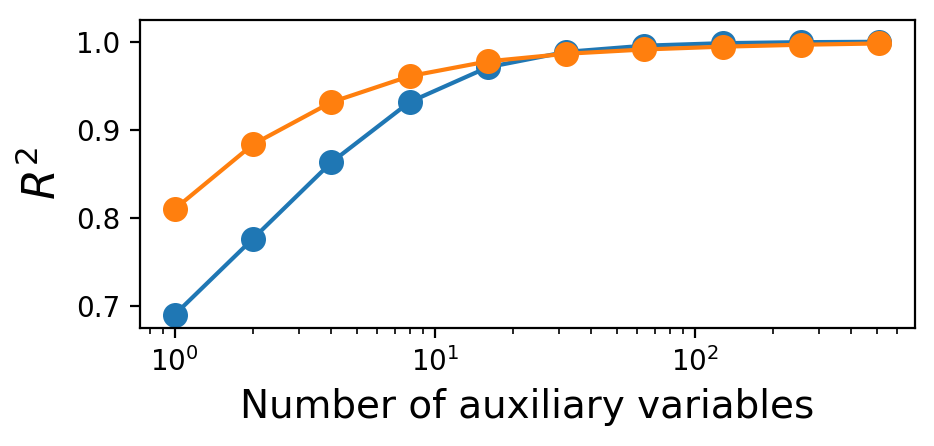

In [159]:
plt.figure(figsize = (5,2), dpi = 200)
plt.plot([d[0] for d in data2plot], [d[1] for d in data2plot], '.-', markersize = 16)
plt.xscale('log')
plt.ylabel('$R^2$', size = 16)
plt.xlabel('Number of auxiliary variables', size = 14)
plt.ylim([0.675, 1.025])
plt.show()